# Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Tweets.csv')

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#Check for unique values

for col in data.columns:
    print(f"Unique values for {col} : {data[col].unique()}\n")

# Using lambda :

# data.apply(lambda x: x.unique())

Unique values for tweet_id : [570306133677760513 570301130888122368 570301083672813571 ...
 569587242672398336 569587188687634433 569587140490866689]

Unique values for airline_sentiment : ['neutral' 'positive' 'negative']

Unique values for airline_sentiment_confidence : [1.     0.3486 0.6837 ... 0.6384 0.7094 0.3487]

Unique values for negativereason : [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']

Unique values for negativereason_confidence : [   nan 0.     0.7033 ... 0.6234 0.644  0.7255]

Unique values for airline : ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']

Unique values for airline_sentiment_gold : [nan 'negative' 'neutral' 'positive']

Unique values for name : ['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']

Unique values for negativereason_gold : [nan 'Late Flight\nFligh

## Pre-Processing Data

In [7]:
# convert 'tweet_created' to datetime and make sure it's in day format

data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data['tweet_created']

0       2015-02-24
1       2015-02-24
2       2015-02-24
3       2015-02-24
4       2015-02-24
           ...    
14635   2015-02-22
14636   2015-02-22
14637   2015-02-22
14638   2015-02-22
14639   2015-02-22
Name: tweet_created, Length: 14640, dtype: datetime64[ns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [9]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
data['tweet_created'].value_counts().idxmax()

Timestamp('2015-02-22 00:00:00')

## Dealing with Null Values

In [11]:
# check for null value

data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
data.apply(lambda x: x.isnull().sum() * 100 / len(x))

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any meaningful information.

In [13]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [14]:
data=data.drop(['airline_sentiment_gold', 'negativereason_gold','tweet_coord'], axis=1)

In [15]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


## EDA

### 1. On which date we had maximum number of tweets?

  Maximum number of tweets on 22nd Feb, 2015

### 2. What is the biggest reason for having negative comments?

In [16]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

### Biggest reason : Issues with the customer service followed by flights being late

###  3. Type of Sentiment by count

In [17]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

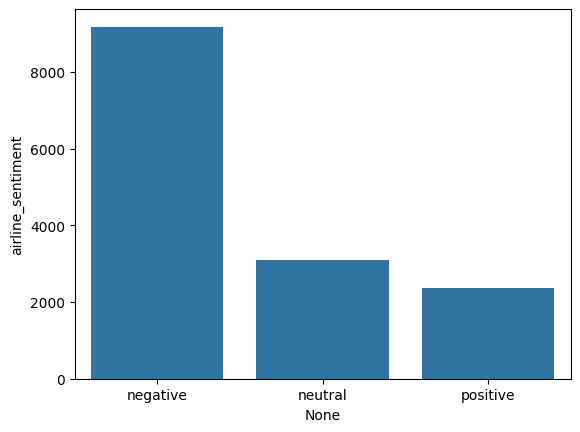

In [18]:
sns.barplot(x = data['airline_sentiment'].value_counts().index, y = data['airline_sentiment'].value_counts())
plt.show()

###  4. Airline sentiments for each airline

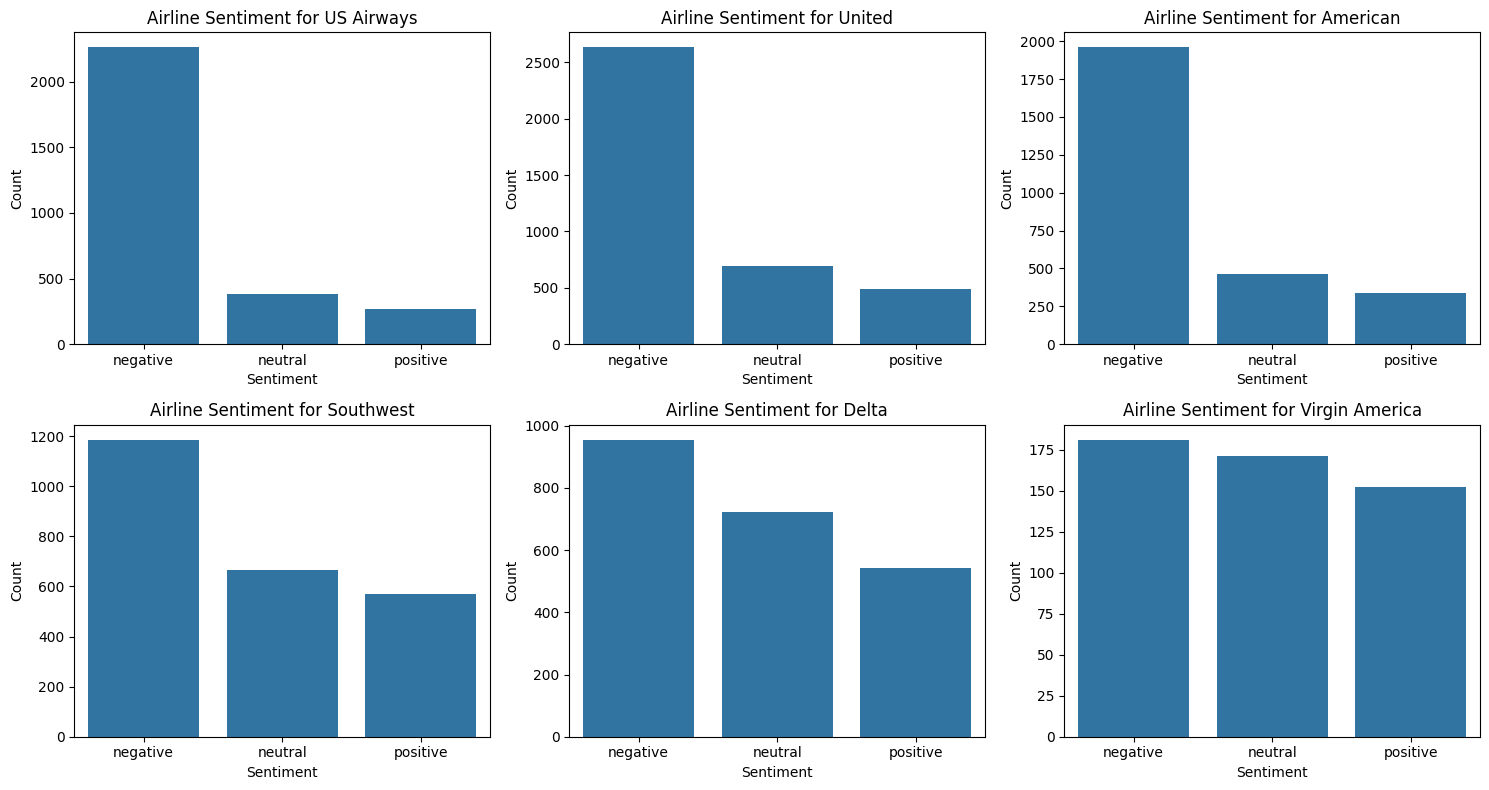

In [19]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(2):
    for j in range(3):
        sns.barplot(ax=axes[i,j], x=data[data['airline'] == airlines[3*i+j]]['airline_sentiment'].value_counts().index, y = data[data['airline'] == airlines[3*i+j]]['airline_sentiment'].value_counts())
        axes[i, j].set_title(f"Airline Sentiment for {airlines[3*i+j]}")
        axes[i, j].set_xlabel('Sentiment')
        axes[i, j].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 5. Airlines by Negative sentiment

In [20]:
 data.groupby(['airline','airline_sentiment']).count().iloc[:,0]

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64

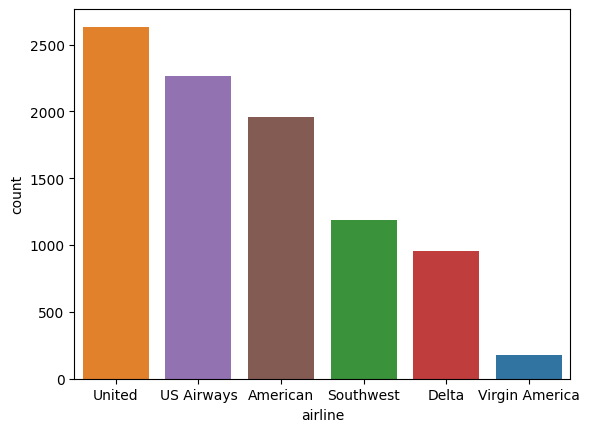

In [21]:
negative_df = data[data['airline_sentiment'] == 'negative']

sns.countplot(x='airline', data=negative_df, order=negative_df['airline'].value_counts().index, hue='airline')
plt.show()

### 6.  Airline by all sentiment

In [22]:
data.groupby(['airline','airline_sentiment']).count().iloc[:,0]

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64

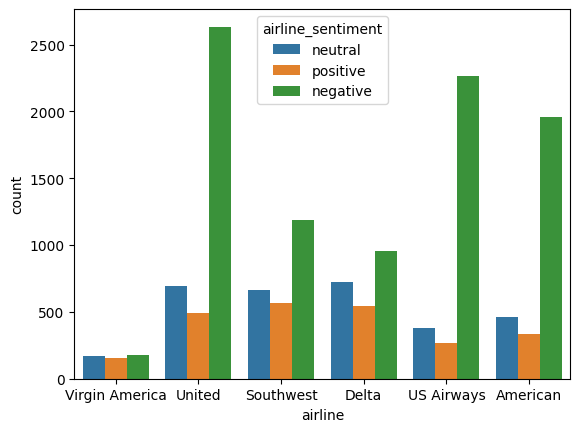

In [23]:
sns.countplot(data=data, x='airline', hue= 'airline_sentiment')
plt.show()

### 7. Is there a relationship between negative sentiments and date?

In [24]:
negative_df.groupby(['tweet_created', 'airline']).count().iloc[:,0]

tweet_created  airline       
2015-02-16     Delta               1
               United              2
2015-02-17     Delta             108
               Southwest         213
               US Airways        233
               United            272
               Virgin America     12
2015-02-18     American            1
               Delta             105
               Southwest         110
               US Airways        244
               United            257
               Virgin America     19
2015-02-19     Delta             135
               Southwest         127
               US Airways        193
               United            272
               Virgin America     24
2015-02-20     American            1
               Delta              91
               Southwest         132
               US Airways        248
               United            342
               Virgin America     21
2015-02-21     American            1
               Delta              98
        

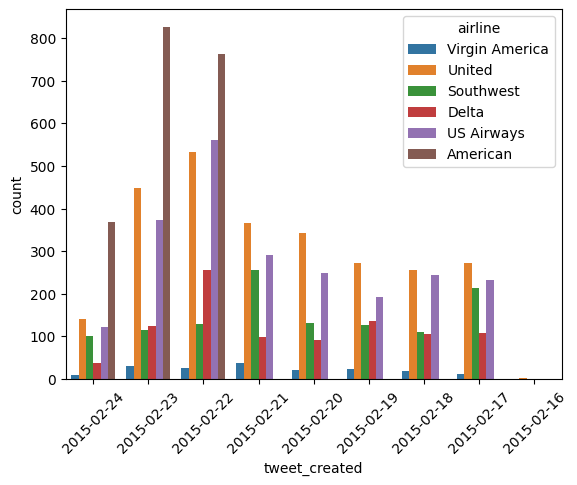

In [25]:
sns.countplot(data=negative_df, x='tweet_created', hue='airline')
plt.xticks(rotation=45)
plt.show()

### February 23, 2015 : For airline "American" , there was a notable spike in negative sentiment on Twitter. However, it reduced to half the very next day


In [26]:
from wordcloud import WordCloud,STOPWORDS

### Word cloud of Positive sentiment

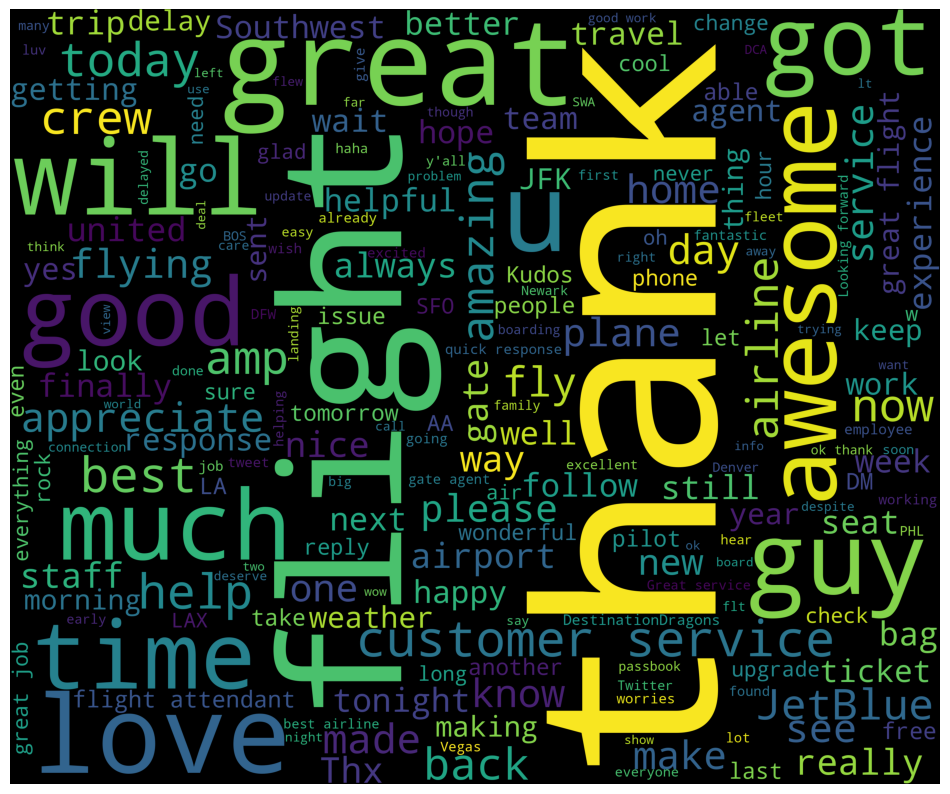

In [27]:
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word cloud of Negative sentiment

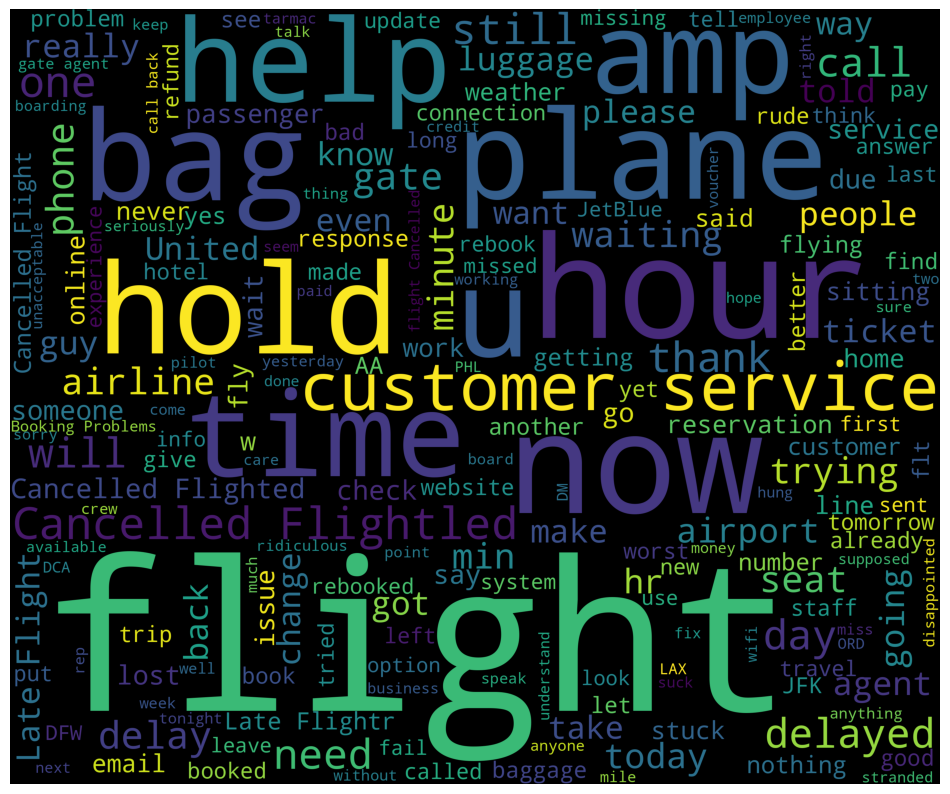

In [28]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Natural Language Processing

### Text Representation
- In Natural Language Processing (NLP) the conversion of raw-text to numerical form is called <b>Text Representation</b>
- This step is most important in the NLP pipeline because if we feed inappropriate data, our prediction will be useless.

If you have good `Text Represntation` and if you use any ordinary algorithm, you will get much better result then if you use highend APIs and algorithm with bad or poor `Text Representation`.


### Basic Text Pre-Processing

**1. Stop-Word Removal** : In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

**2. Lower Casing** : Convert all words into the lower case because the upper or lower case may not make a difference for the problem.
And we are reducing vocabulary size by doing so.

**3. Stemming** : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

**4. Tokenization** : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.

In [29]:
df = data.copy()

In [30]:
pip install nltk

In [31]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# the words related the name of airlines are not relevant to the sentiment analysis
# Therefore I decided to append the above names into the list of stop words.
# you can also append any names in to the list for custom cleaning.

def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
df['final_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [33]:
print(" ".join(df.final_text[0]),'\n')
print(" ".join(df.final_text[1]),'\n')
print(" ".join(df.final_text[100]),'\n')
print(" ".join(df.final_text[1000]),'\n')

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 



## Text Analysis

### Lexicon based approach (Easy way to find Sentiment)

The lexicon-based approach involves calculating orientation for a document from the semantic orientation of words or phrases in the document.it uses dictionaries of words annotated with the word's semantic orientation, or polarity.

Here we will just try to verify the lexicon works hopefully very well to classify the sentiment which has already been allocated by the real customers.

#### Vader

Vader is a lexicon made for the sentiment analysis of text data on social media.

It returns the compounded polarity score of a sentence after calculating the negative, the neutral, and the positive scores of each word in a sentence.

We can use Vader from the innner module in nltk as well as the Python API [vaderSentiment](https://pypi.org/project/vaderSentiment/).

VADER has many advantages over traditional sentiment analysis methods: [source](https://ichi.pro/ko/python-eseo-vaderleul-sayonghayeo-gamjeong-bunseog-dansunhwa-sosyeol-midieo-tegseuteu-274770204542255)

* **It works very well with social media type text**, but generalizes easily to multiple domains.
* It does not require any training data, but consists of a generalized, balence-based, human-curated gold standard psychological vocabulary.
* It's fast enough to use online with streaming data,
* The speed-performance trade-off isn't serious.



In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df.final_text[0]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [35]:
texts = [" ".join(df.final_text[i]) for i in range(len(df))]

print(df.text[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Actual Classification: {df.airline_sentiment[0]}', '\n')

print(df.text[1])
print(texts[1])
print(vader.polarity_scores(texts[1]), f'--> Actual Classification: {df.airline_sentiment[1]}', '\n')

print(df.text[10])
print(texts[10])
print(vader.polarity_scores(texts[10]), f'--> Actual Classification: {df.airline_sentiment[10]}', '\n')

print(df.text[100])
print(texts[100])
print(vader.polarity_scores(texts[100]), f'--> Actual Classification: {df.airline_sentiment[100]}', '\n')


@VirginAmerica What @dhepburn said.
dhepburn said
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 

@VirginAmerica plus you've added commercials to the experience... tacky.
plus youve added commercials experience tacky
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: positive 

@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
know suicide second leading cause death among teens
{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.8555} --> Actual Classification: neutral 

@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
trying add boy prince ressie sf thursday lax httptcogsbjcgm
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 



### Machine Learning approach

ML approach is also known as Document Classificaton. It uses ML algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.


* Vectorization : `CountVectorizer`, `TfidfTransformer`, `Word2Vec`
* Model: Logistic Regression, RandomForest, SupportVectorMachine

In [36]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [37]:
df.final_text

0                                         [dhepburn, said]
1        [plus, youve, added, commercials, experience, ...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635                     [thank, got, different, chicago]
14636    [leaving, minutes, late, warnings, communicati...
14637                          [please, bring, blackberry]
14638    [money, change, dont, answer, phones, suggesti...
14639    [ppl, need, know, many, seats, next, plz, put,...
Name: final_text, Length: 14640, dtype: object

In [38]:
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

<ipython-input-38-81874cf7add1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'][i] = " ".join(df['final_text'][i])


In [39]:
df['final_text'][:3]

0                                    dhepburn said
1    plus youve added commercials experience tacky
2     didnt today must mean need take another trip
Name: final_text, dtype: object

In [40]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [41]:
X = df.final_text
y = df.airline_sentiment

In [42]:
X.head()

0                                        dhepburn said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: final_text, dtype: object

In [43]:
y.head()

0    1
1    2
2    1
3    0
4    0
Name: airline_sentiment, dtype: int64

#### CountVectorizer & TfidfVectorizer

In [44]:
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

c = CountVectorizer()
X_c = c.fit_transform(X)

tf = TfidfVectorizer()
X_tf = tf.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df.index, df.airline_sentiment)):
        X_c_trn = X_c[trn_idx]
        X_tf_trn = X_tf[trn_idx]
        y_trn = df.loc[trn_idx, 'airline_sentiment']

        X_c_vld = X_c[vld_idx]
        X_tf_vld = X_tf[vld_idx]
        y_vld = df.loc[vld_idx, 'airline_sentiment']

        model.fit(X_c_trn, y_trn)
        c_pred_col = f"{model_name}_ct_pred"
        df.loc[vld_idx, c_pred_col] = model.predict(X_c_vld)

        model.fit(X_tf_trn, y_trn)
        tf_pred_col = f"{model_name}_tf_pred"
        df.loc[vld_idx, tf_pred_col] = model.predict(X_tf_vld)

    print(f"Model: {model_name}, CountVectorizer, Accuracy: {accuracy_score(df.airline_sentiment, df[c_pred_col]):.3%}")
    print(f"Model: {model_name}, TfidfVectorizer, Accuracy: {accuracy_score(df.airline_sentiment, df[tf_pred_col]):.3%}\n")

Model: LogisticRegression, CountVectorizer, Accuracy: 78.921%
Model: LogisticRegression, TfidfVectorizer, Accuracy: 76.858%

Model: RandomForest, CountVectorizer, Accuracy: 76.926%
Model: RandomForest, TfidfVectorizer, Accuracy: 76.660%

Model: SupportVectorMachine, CountVectorizer, Accuracy: 77.152%
Model: SupportVectorMachine, TfidfVectorizer, Accuracy: 76.701%



#### Word2Vec

Word2Vec is one of the most popular model to represent a word in a large text corpus as a vector in n-dimensional space.

There are two kinds of W2V, Continuous Bag-of-Words(CBOW) and Skip-Gram.

Skip-gram is used to predict the context word for a given target word. It’s reverse of CBOW algorithm. Here, target word is input while context words are output.

In most case it is known that the predictability of skip-gram is better than the one of CBOW.

We can use `Word2Vec` library from `gensim` and set the option `sg` which is the abbreviation of skip-gram.

In [45]:
pip install gensim

In [46]:
from gensim.models import Word2Vec

texts_w2v = df.final_text.apply(tokenize).to_list()

w2v = Word2Vec(sentences = texts_w2v, window = 3,
               vector_size = 100, min_count = 5, workers = 4, sg = 1)

In [47]:
texts_w2v[:3]

[['dhepburn', 'said'],
 ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky'],
 ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']]

<br>

`Word2Vec` imported from `gensim` trains the texts at the same time as it is declared by the user.

We can find the similar words with the given word and the examples are represented below.

<br>

In [48]:
w2v.wv.most_similar('thank')

[('appreciate', 0.9695593118667603),
 ('much', 0.962988555431366),
 ('amazing', 0.9522805213928223),
 ('thanks', 0.9506638646125793),
 ('awesome', 0.944612443447113),
 ('quick', 0.9445539712905884),
 ('care', 0.9348621368408203),
 ('twitter', 0.9245358109474182),
 ('response', 0.9201844334602356),
 ('team', 0.9146376848220825)]

In [49]:
w2v.wv.most_similar('customerservice')

[('neveragain', 0.9938579201698303),
 ('nightmare', 0.9934722185134888),
 ('americanairlines', 0.9931246042251587),
 ('zero', 0.9919995665550232),
 ('horrendous', 0.9917200207710266),
 ('unhappy', 0.9914997816085815),
 ('shitty', 0.9912264943122864),
 ('literally', 0.9907799959182739),
 ('communication', 0.990725576877594),
 ('blame', 0.9907006025314331)]